### Question 27

In [1]:
import json
import numpy as np

def report_statistics(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = np.inf
        total_followers = 0
        total_retweets = 0
        total_tweets = len(lines)
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']
            total_followers += json_obj['author']['followers']
            total_retweets += json_obj['metrics']['citations']['total']
        avg_tweets_per_h = total_tweets * 3600 / (max_time - min_time)
        avg_followers_per_tweet = total_followers / total_tweets
        avg_retweets_per_tweet = total_retweets / total_tweets
        print(filename)
        print('Average number of tweets per hour: ', avg_tweets_per_h)
        print('Average number of followers of users posting the tweets per tweet: ', avg_followers_per_tweet)
        print('Average number of retweets per tweet: ', avg_retweets_per_tweet)
        print('-' * 50)

In [2]:
files = ['ECE219_tweet_data/tweets_#gohawks.txt', 'ECE219_tweet_data/tweets_#gopatriots.txt', 
         'ECE219_tweet_data/tweets_#nfl.txt', 'ECE219_tweet_data/tweets_#patriots.txt', 
         'ECE219_tweet_data/tweets_#sb49.txt', 'ECE219_tweet_data/tweets_#superbowl.txt']

for file in files:
    report_statistics(file)

ECE219_tweet_data/tweets_#gohawks.txt
Average number of tweets per hour:  292.48785062173687
Average number of followers of users posting the tweets per tweet:  2217.9237355281984
Average number of retweets per tweet:  2.0132093991319877
--------------------------------------------------
ECE219_tweet_data/tweets_#gopatriots.txt
Average number of tweets per hour:  40.954698006061946
Average number of followers of users posting the tweets per tweet:  1427.2526051635405
Average number of retweets per tweet:  1.4081919101697078
--------------------------------------------------
ECE219_tweet_data/tweets_#nfl.txt
Average number of tweets per hour:  397.0213901819841
Average number of followers of users posting the tweets per tweet:  4662.37544523693
Average number of retweets per tweet:  1.5344602655543254
--------------------------------------------------
ECE219_tweet_data/tweets_#patriots.txt
Average number of tweets per hour:  750.8942646068899
Average number of followers of users posting

### Question 28

In [35]:
import math 
import matplotlib.pyplot as plt
import datetime
import pytz

pst_tz = pytz.timezone('America/Los_Angeles')

def report_tweets(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = np.inf
        total_tweets = len(lines)
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']
        
        total_hours = math.ceil((max_time - min_time) / 3600)
        n_tweets = [0] * total_hours
        for line in lines:
            json_obj = json.loads(line)
            index = math.floor((json_obj['citation_date'] - min_time) / 3600)
            n_tweets[index] += 1
        return n_tweets

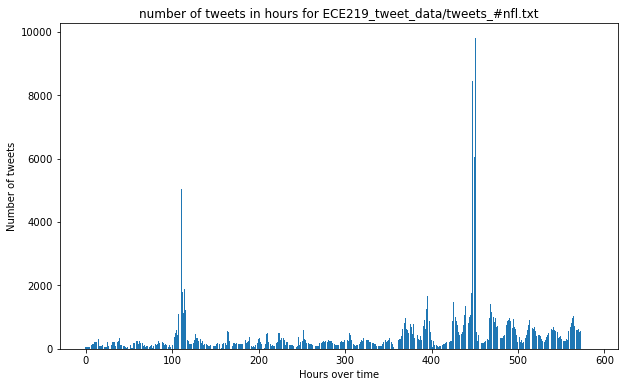

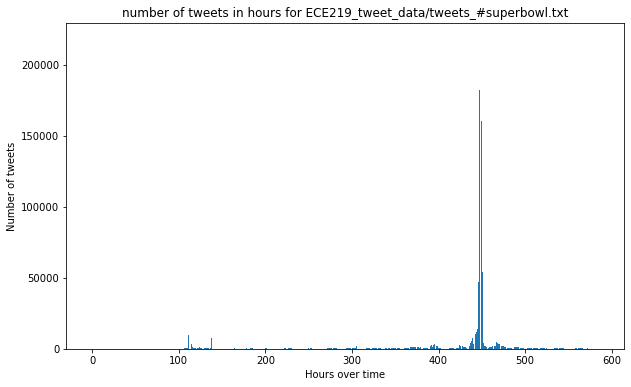

In [36]:
q2_files = ['ECE219_tweet_data/tweets_#nfl.txt','ECE219_tweet_data/tweets_#superbowl.txt']

for file in q2_files:
    n_tweets = report_tweets(file)
    plt.figure(figsize=(10,6))
    plt.bar(range(len(n_tweets)),n_tweets)
    plt.xlabel('Hours over time')
    plt.ylabel('Number of tweets')
    plt.title('number of tweets in hours for '+file)


# DEFINE YOUR OWN TASK

### FEATURE ANALYSIS

In [16]:
# find the intersected time intervals for all twitter data
def get_time_interval(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
        max_time = 0
        min_time = np.inf
        for line in lines:
            json_obj = json.loads(line)
            if json_obj['citation_date'] > max_time:
                max_time = json_obj['citation_date']
            if json_obj['citation_date'] < min_time:
                min_time = json_obj['citation_date']
        return max_time, min_time
    
max_t = []
min_t = []
for file in files:
    max_time, min_time = get_time_interval(file)
    max_t.append(max_time)
    min_t.append(min_time)

max_time_agg = min(max_t)
min_time_agg = max(min_t)

In [17]:
feature_names = ['Number of tweets', 'Total number of retweets', 'Sum of the number of followers', 
                'Maximum number of followers', 'Time of the day', 'Sum of ranking score',
                'Sum of passivity', 'Total number of unique users','Total number of unique authors', 
                'Total number of user mentions']

mnth_to_int = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
              'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

def get_days(user_create_time, tweet_create_time):
    user_create_date = user_create_time.split(' ')
    tweet_create_date = tweet_create_time.split(' ')
    user_create_date = datetime.datetime(int(user_create_date[-1]), mnth_to_int[user_create_date[1]], int(user_create_date[2]))
    tweet_create_date = datetime.datetime(int(tweet_create_date[-1]), mnth_to_int[tweet_create_date[1]], int(tweet_create_date[2]))
    created_days = tweet_create_date - user_create_date
    created_days = created_days.days
    return created_days


def report_features2(filename, min_time, max_time):
    with open(filename, 'r') as file:
        lines = file.readlines()
        
        total_hours = math.ceil((max_time - min_time) / 3600)
        user_ids = {hour:set() for hour in range(total_hours)}
        author_nicks = {hour:set() for hour in range(total_hours)}
        
        #initialize features
        features = np.zeros((total_hours,len(feature_names)))
        
        for hour in range(total_hours):
            features[hour][4] = datetime.datetime.fromtimestamp((min_time + hour * 3600), pst_tz).hour
            
        for line in lines:
            json_obj = json.loads(line)
            
            if json_obj['citation_date'] >= min_time and json_obj['citation_date'] <= max_time:
                index = math.floor((json_obj['citation_date'] - min_time) / 3600)
                features[index][0] += 1 #number of tweets
                features[index][1] += json_obj['metrics']['citations']['total'] #number of retweets
                features[index][2] += json_obj['author']['followers'] #number of followers
                features[index][3] = max(features[index][3], json_obj['author']['followers']) #max number of followers

                features[index][5] += json_obj['metrics']['ranking_score'] #sum of ranking score
                n_days = get_days(json_obj['tweet']['user']['created_at'], json_obj['tweet']['created_at']) #get the number of days since the user account was created
                features[index][6] += n_days/(1.0 + json_obj['tweet']['user']['statuses_count']) #sum of passivity
                if json_obj['tweet']['user']['id'] not in user_ids[index]:
                    user_ids[index].add(json_obj['tweet']['user']['id'])               
                features[index][7] = len(user_ids[index]) #number of unique users
                if json_obj['author']['nick'] not in author_nicks[index]:
                    author_nicks[index].add(json_obj['author']['nick'])
                features[index][8] = len(author_nicks[index]) #number of unique authors
                features[index][9] += len(json_obj['tweet']['entities']['user_mentions']) #number of user mentions
        
        return features

    
def scatter_plot(features, hashtag, y_pred, pvalues, feature_names):
    ranked_index = np.argsort(pvalues)
    print('Hashtag: ' + hashtag)
    for i in range(3):
        plt.figure(figsize = (8,5))
        plt.scatter(features[:,ranked_index[i]], y_pred, alpha=0.5)
        plt.xlabel(feature_names[ranked_index[i]])
        plt.ylabel("Number of tweets next hour")
        plt.grid(True)
        plt.show()
    print('-' * 80)    


Hashtag: ECE219_tweet_data/tweets_#gohawks.txt
MSE:  296042.3173115547
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.783
Model:                            OLS   Adj. R-squared (uncentered):              0.779
Method:                 Least Squares   F-statistic:                              201.8
Date:                Fri, 18 Mar 2022   Prob (F-statistic):                   1.43e-178
Time:                        12:20:59   Log-Likelihood:                         -4407.0
No. Observations:                 571   AIC:                                      8834.
Df Residuals:                     561   BIC:                                      8878.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      

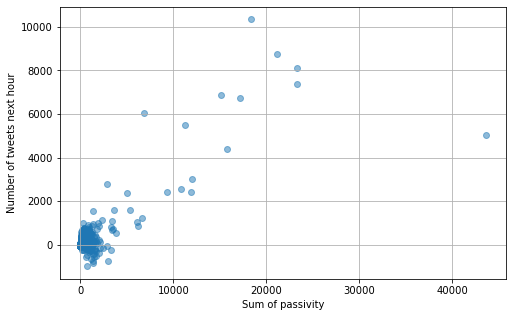

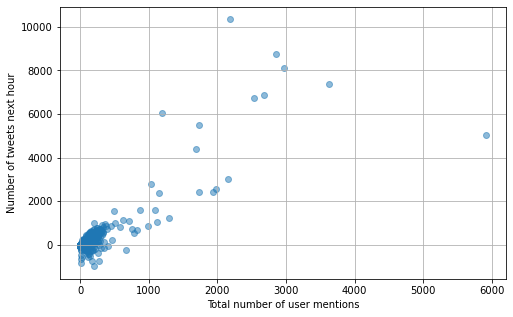

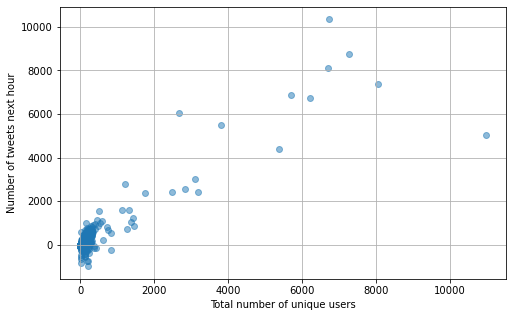

--------------------------------------------------------------------------------


Hashtag: ECE219_tweet_data/tweets_#gopatriots.txt
MSE:  21727.945699825388
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.742
Model:                            OLS   Adj. R-squared (uncentered):              0.738
Method:                 Least Squares   F-statistic:                              161.6
Date:                Fri, 18 Mar 2022   Prob (F-statistic):                   5.56e-158
Time:                        12:21:00   Log-Likelihood:                         -3661.3
No. Observations:                 571   AIC:                                      7343.
Df Residuals:                     561   BIC:                                      7386.
Df Model:                          10                                                  
Covariance Type:            nonrobust             

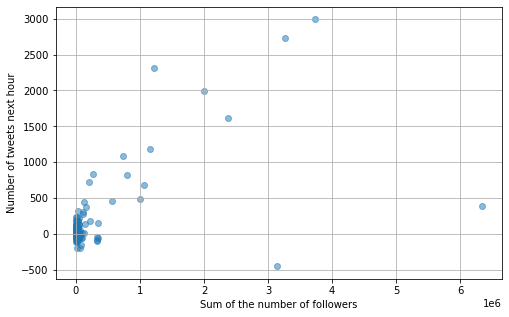

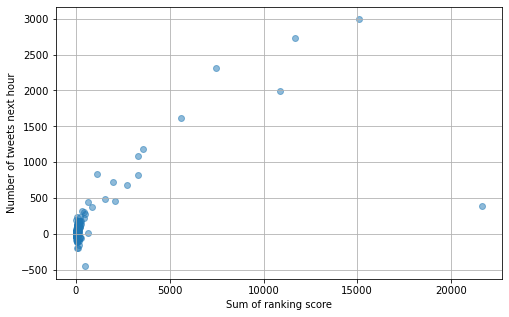

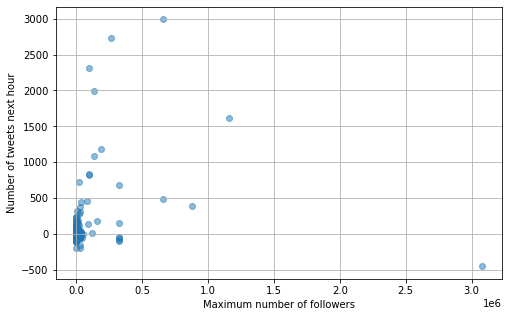

--------------------------------------------------------------------------------


Hashtag: ECE219_tweet_data/tweets_#nfl.txt
MSE:  184288.3990593153
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.768
Model:                            OLS   Adj. R-squared (uncentered):              0.764
Method:                 Least Squares   F-statistic:                              186.0
Date:                Fri, 18 Mar 2022   Prob (F-statistic):                   7.02e-171
Time:                        12:21:10   Log-Likelihood:                         -4271.7
No. Observations:                 571   AIC:                                      8563.
Df Residuals:                     561   BIC:                                      8607.
Df Model:                          10                                                  
Covariance Type:            nonrobust                     

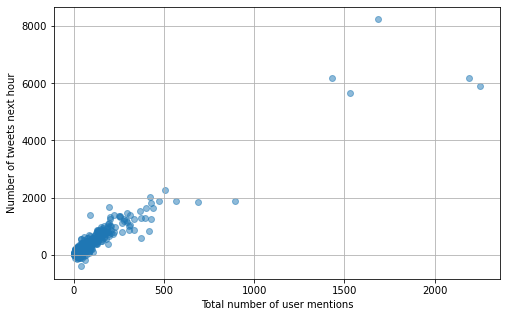

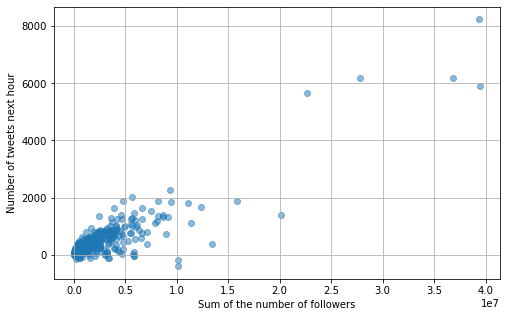

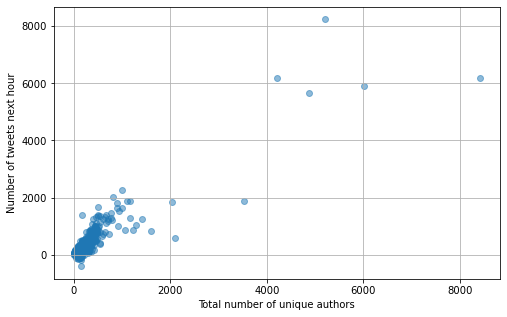

--------------------------------------------------------------------------------


Hashtag: ECE219_tweet_data/tweets_#patriots.txt
MSE:  3619767.990944839
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.783
Model:                            OLS   Adj. R-squared (uncentered):              0.779
Method:                 Least Squares   F-statistic:                              202.0
Date:                Fri, 18 Mar 2022   Prob (F-statistic):                   1.18e-178
Time:                        12:21:30   Log-Likelihood:                         -5121.8
No. Observations:                 571   AIC:                                  1.026e+04
Df Residuals:                     561   BIC:                                  1.031e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                

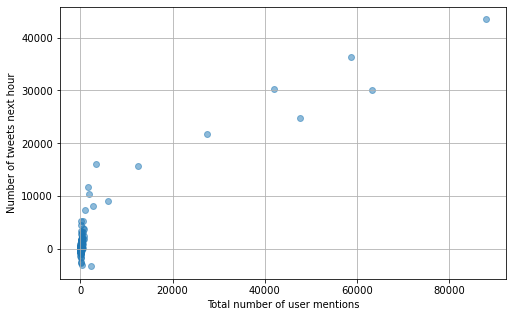

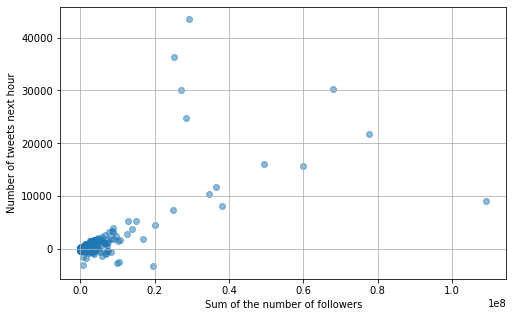

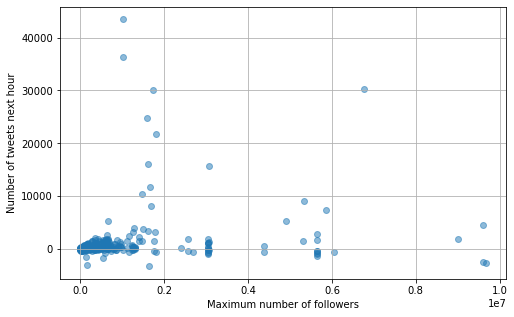

--------------------------------------------------------------------------------


Hashtag: ECE219_tweet_data/tweets_#sb49.txt
MSE:  8860126.964503594
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.895
Model:                            OLS   Adj. R-squared (uncentered):              0.894
Method:                 Least Squares   F-statistic:                              480.7
Date:                Fri, 18 Mar 2022   Prob (F-statistic):                   1.30e-267
Time:                        12:22:06   Log-Likelihood:                         -5377.4
No. Observations:                 571   AIC:                                  1.077e+04
Df Residuals:                     561   BIC:                                  1.082e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                    

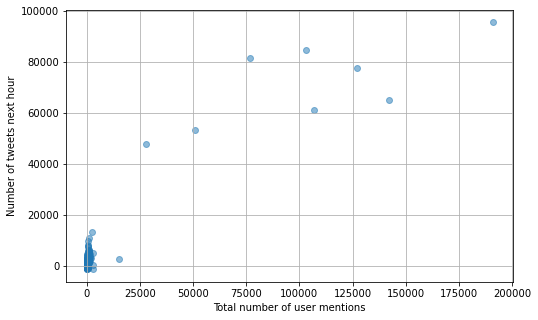

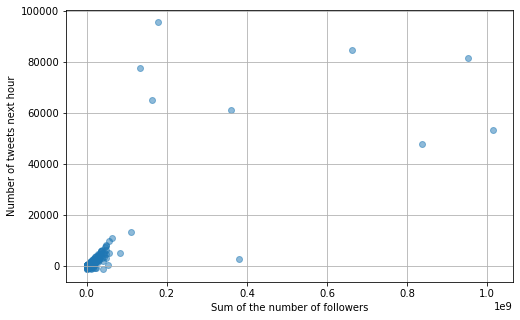

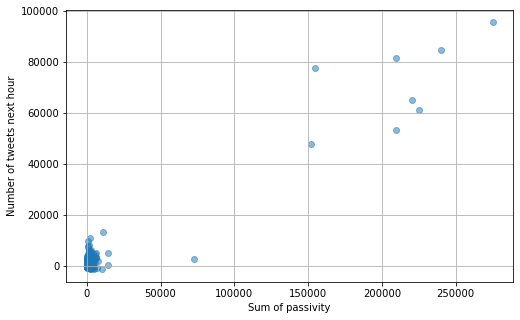

--------------------------------------------------------------------------------


Hashtag: ECE219_tweet_data/tweets_#superbowl.txt
MSE:  15458967.544835165
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.943
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              932.3
Date:                Fri, 18 Mar 2022   Prob (F-statistic):                        0.00
Time:                        12:23:23   Log-Likelihood:                         -5536.3
No. Observations:                 571   AIC:                                  1.109e+04
Df Residuals:                     561   BIC:                                  1.114e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust              

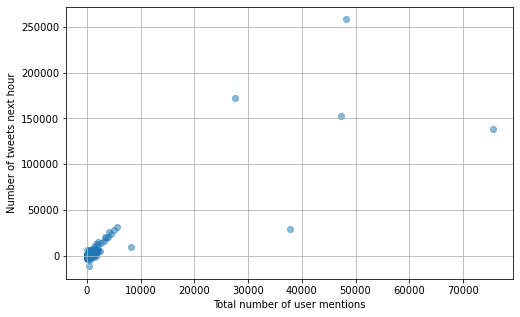

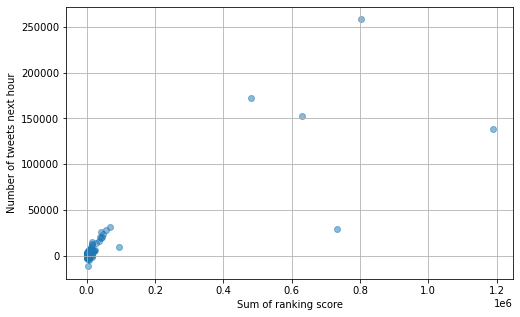

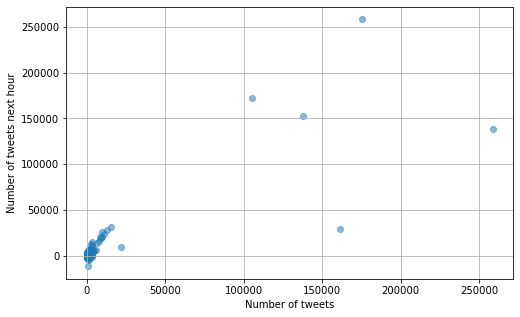

--------------------------------------------------------------------------------




In [18]:
import statsmodels.api as sm
from sklearn import metrics


for file in files:
    features = report_features2(file, min_time_agg, max_time_agg)
    x = features[:-1,:] #training features
    y_true = features[1:,0] #true labels

    lr_fit = sm.OLS(y_true,x).fit()
    y_pred = lr_fit.predict()
    pvalues = lr_fit.pvalues
    print('Hashtag: ' + file)
    print('MSE: ', metrics.mean_squared_error(y_true, y_pred))
    print(lr_fit.summary())
    scatter_plot(x, file, y_pred, pvalues, feature_names)
    print('\n')

### FANBASE PREDICTION

In [19]:
import json

# exclude any tweets whose author is not from Washington or Massachusetts
WA_substrings = ['Washington', 'Seattle', 'WA']
MA_substrings = ['Massachusetts', 'Boston', 'MA']

superbowl_dataset_trimmed = []

with open('ECE219_tweet_data/tweets_#superbowl.txt', 'r') as file:
    lines = file.readlines()
    
    for line in lines:
        json_obj = json.loads(line)
        location = json_obj['tweet']['user']['location']
        
        for w in WA_substrings:
            if w in location:
                superbowl_dataset_trimmed.append((json_obj['tweet']['text'], 'Washington'))
                break
                
        for m in MA_substrings:
            if m in location:
                superbowl_dataset_trimmed.append((json_obj['tweet']['text'], 'Massachusetts'))
                break

In [20]:
# Train a binary classifier
import numpy as np
from sklearn.model_selection import train_test_split

x_superbowl = np.array(superbowl_dataset_trimmed)[:, 0]
y_superbowl = np.array(superbowl_dataset_trimmed)[:, 1]

y_superbowl_binary = np.zeros(y_superbowl.shape)
y_superbowl_binary[y_superbowl == 'Washington'] = 1

x_train, x_test, y_train, y_test = train_test_split(x_superbowl, y_superbowl_binary, test_size=0.1, random_state=42)

In [21]:
import nltk
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from collections import defaultdict

# pos_tags: treebank to wordnet
tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

wnl = WordNetLemmatizer()
    
def lemmatize(data):
    lemmatized = []
    for doc in data:
        tokens = word_tokenize(doc)
        words = [wnl.lemmatize(word, tag_map[tag[0]]) for word,tag in pos_tag(tokens) 
                 if wnl.lemmatize(word, tag_map[tag[0]]).isalpha()]
        sentence = ' '.join(words)
        lemmatized.append(sentence)
    return lemmatized

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

x_train_lemmatized = lemmatize(x_train)
x_test_lemmatized = lemmatize(x_test)

tfidf_vectorizer = TfidfVectorizer(stop_words='english', min_df=3)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train_lemmatized)
x_test_tfidf = tfidf_vectorizer.transform(x_test_lemmatized)

svd = TruncatedSVD(n_components=50, random_state=42)
x_train_svd = svd.fit_transform(x_train_tfidf)
x_test_svd = svd.transform(x_test_tfidf)

In [23]:
# Logistic Regression: GridSearch
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import pandas as pd


grid_logistic = GridSearchCV(estimator=LogisticRegression(random_state=42), 
                        param_grid={'C':[10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3],
                                   'penalty': ['l1', 'l2', 'elasticnet']}, 
                        cv=5, n_jobs=-1, verbose=1).fit(x_train_svd, y_train)

result_logistic = pd.DataFrame(grid_logistic.cv_results_)[['mean_test_score', 'param_C', 'param_penalty']]
result_logistic = result_logistic.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
result_logistic.head()

Fitting 5 folds for each of 21 candidates, totalling 105 fits


/Users/shwetakatti/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.56505312        nan        nan 0.69919142        nan
        nan 0.71877536        nan        nan 0.72356763        nan
        nan 0.72423577        nan        nan 0.72432794        nan
        nan 0.7243049         nan]
  warnings.warn(


,mean_test_score,param_C,param_penalty
0,0.724328,100,l2
1,0.724305,1000,l2
2,0.724236,10,l2
3,0.723568,1,l2
4,0.718775,0.1,l2


In [24]:
logistic_optim = LogisticRegression(penalty=grid_logistic.best_params_['penalty'], 
                                    C=grid_logistic.best_params_['C'], random_state=42)

logistic_optim.fit(x_train_svd, y_train)

LogisticRegression(C=100, random_state=42)

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

y_pred_logistic = logistic_optim.predict(x_test_svd)
y_pred_prob_logistic = logistic_optim.predict_proba(x_test_svd)[:,1]

print('Logistic Regression:')
print('confusion_matrix:\n', confusion_matrix(y_test, y_pred_logistic))
print('accuracy:', accuracy_score(y_test, y_pred_logistic))
print('recall:', recall_score(y_test, y_pred_logistic))
print('precision:', precision_score(y_test, y_pred_logistic))
print('f1_score:', f1_score(y_test, y_pred_logistic))

Logistic Regression:
confusion_matrix:
 [[1020 1139]
 [ 184 2480]]
accuracy: 0.7256894049346879
recall: 0.9309309309309309
precision: 0.6852721746338768
f1_score: 0.7894318000954959


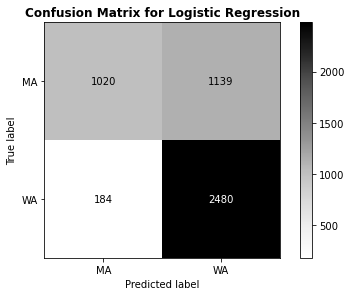

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

class_names = ['MA', 'WA']

plot_confusion_matrix(logistic_optim, x_test_svd, y_test, display_labels=class_names, 
                             values_format='d', cmap=plt.cm.Greys)
plt.tight_layout()
plt.title('Confusion Matrix for Logistic Regression', fontweight='bold')
plt.show()

In [27]:
# RandomForest: GridSearch
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

pipe_rfc = Pipeline([
    ('standardize', StandardScaler()),
    ('model', RandomForestClassifier(random_state=42))
])

param_grid = {
    'model__max_depth': [10, 30, 50, 70, 100, 200, None]
}


grid_rfc = GridSearchCV(pipe_rfc, param_grid=param_grid, cv=KFold(5, shuffle=True, random_state=42), n_jobs=-1, verbose=1)
grid_rfc.fit(x_train_svd, y_train)

result_rfc = pd.DataFrame(grid_rfc.cv_results_)[['mean_test_score', 'param_model__max_depth']]
result_rfc = result_rfc.sort_values(by=['mean_test_score'], ascending=False).reset_index(drop=True)
result_rfc.head()

Fitting 5 folds for each of 7 candidates, totalling 35 fits


,mean_test_score,param_model__max_depth
0,0.723729,30
1,0.720595,70
2,0.720595,100
3,0.720595,200
4,0.720595,None


In [28]:
pipe_rfc_optim = Pipeline([
        ('standardize', StandardScaler()),
        ('model', RandomForestClassifier(max_depth=30, random_state=42))
])

pipe_rfc_optim.fit(x_train_svd, y_train)

Pipeline(steps=[('standardize', StandardScaler()),
                ('model',
                 RandomForestClassifier(max_depth=30, random_state=42))])

In [29]:
y_pred_rfc = pipe_rfc_optim.predict(x_test_svd)
y_pred_prob_rfc = pipe_rfc_optim.predict_proba(x_test_svd)[:,1]

print('Logistic Regression:')
print('confusion_matrix:\n', confusion_matrix(y_test, y_pred_rfc))
print('accuracy:', accuracy_score(y_test, y_pred_rfc))
print('recall:', recall_score(y_test, y_pred_rfc))
print('precision:', precision_score(y_test, y_pred_rfc))
print('f1_score:', f1_score(y_test, y_pred_rfc))


Logistic Regression:
confusion_matrix:
 [[1336  823]
 [ 484 2180]]
accuracy: 0.7290068422143894
recall: 0.8183183183183184
precision: 0.7259407259407259
f1_score: 0.7693665078524792


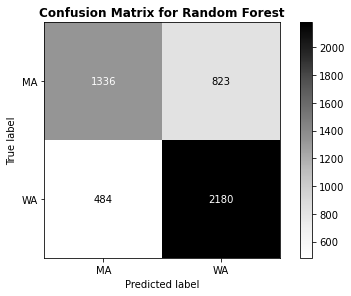

In [30]:
plot_confusion_matrix(pipe_rfc_optim, x_test_svd, y_test, display_labels=class_names, 
                             values_format='d', cmap=plt.cm.Greys)
plt.tight_layout()
plt.title('Confusion Matrix for Random Forest', fontweight='bold')
plt.show()

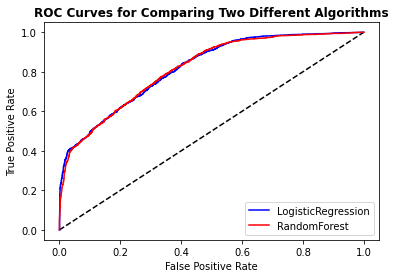

In [34]:
# aggregated ROC curves
from sklearn.metrics import roc_curve

fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_prob_logistic)
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_pred_prob_rfc)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_logistic, tpr_logistic, label = 'LogisticRegression', color='b', linewidth=1.5)
plt.plot(fpr_rfc, tpr_rfc, label = 'RandomForest', color='r', linewidth=1.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.title('ROC Curves for Comparing Two Different Algorithms', weight='bold')
plt.show()

### SEMANTIC ANALYSIS

In [12]:
import datetime
import time
import pytz
import math 
import matplotlib.pyplot as plt


pst_tz = pytz.timezone('America/Los_Angeles')

pre_active_time = datetime.datetime(2015, 2, 1, 8, 0, 0, 0, pst_tz)
post_active_time = datetime.datetime(2015, 2, 1, 20, 0, 0, 0, pst_tz)
pre_active_timestamp = time.mktime(pre_active_time.timetuple())
post_active_timestamp = time.mktime(post_active_time.timetuple())

In [8]:
import nltk
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')

from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from collections import defaultdict

# pos_tags: treebank to wordnet
tag_map = defaultdict(lambda: wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

wnl = WordNetLemmatizer()
    
def lemmatize_tweet(tweet):
    tokens = word_tokenize(tweet)
    words = [wnl.lemmatize(word, tag_map[tag[0]]) for word,tag in pos_tag(tokens) 
             if wnl.lemmatize(word, tag_map[tag[0]]).isalpha()]
    sentence = ' '.join(words)
    return sentence

In [9]:
import math
import json
import numpy as np
from textblob import TextBlob

def perform_sentiment_analysis(filename, min_time=pre_active_timestamp, max_time=post_active_timestamp):
    with open(filename, 'r') as file:
        lines = file.readlines()
        
        num_time_window = math.ceil((max_time - min_time) / (3600))
        
        # initialization
        sentiment_summary = []
        for _ in range(num_time_window):
            sentiment_summary.append([])
        positive_tweets, negative_tweets = np.zeros((num_time_window, 1)), np.zeros((num_time_window, 1))
            
        for line in lines:
            # retrieve index of one-hour time window
            json_obj = json.loads(line)
            date = json_obj['citation_date']
            if min_time <= date <= max_time:
                index = math.floor((date - min_time) / 3600)
                # sentiment polarity
                tweet = json_obj['tweet']['text']
                polarity = TextBlob(lemmatize_tweet(tweet)).sentiment.polarity
                if polarity > 0:
                    positive_tweets[index, 0] += 1
                elif polarity < 0:
                    negative_tweets[index, 0] += 1

                sentiment_summary[index].append(polarity)
        
        sentiment_dist = []
        for x in sentiment_summary:
            if x:
                sentiment_dist.append(np.mean(x))
            else:
                sentiment_dist.append(sentiment_dist[-1])
        return sentiment_dist, positive_tweets, negative_tweets

In [10]:
seahawks_sentiment, seahawks_positive, seahawks_negative = perform_sentiment_analysis('ECE219_tweet_data/tweets_#gohawks.txt')
patriots_sentiment, patriots_positive, patriots_negative = perform_sentiment_analysis('ECE219_tweet_data/tweets_#gopatriots.txt')

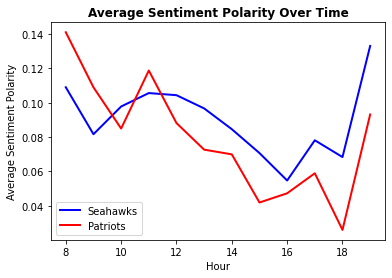

In [13]:
plt.plot(np.arange(8, 20), seahawks_sentiment, label='Seahawks', color='b', linewidth=2)
plt.plot(np.arange(8, 20), patriots_sentiment, label='Patriots', color='r', linewidth=2)
plt.xlabel('Hour')
plt.ylabel('Average Sentiment Polarity')
plt.legend()
plt.title('Average Sentiment Polarity Over Time', weight='bold')
plt.show()

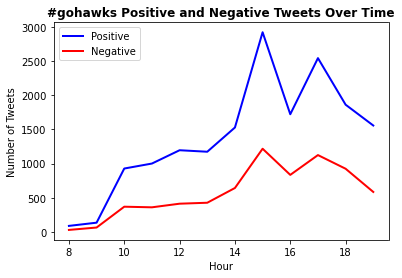

In [14]:
plt.plot(np.arange(8, 20), seahawks_positive, label='Positive', color='b', linewidth=2)
plt.plot(np.arange(8, 20), seahawks_negative, label='Negative', color='r', linewidth=2)
plt.xlabel('Hour')
plt.ylabel('Number of Tweets')
plt.legend()
plt.title('#gohawks Positive and Negative Tweets Over Time', weight='bold')
plt.show()


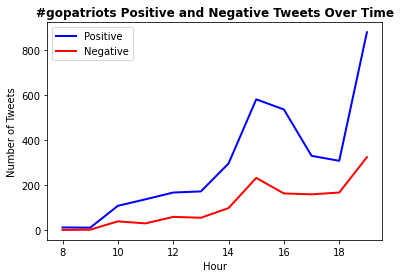

In [15]:
plt.plot(np.arange(8, 20), patriots_positive, label='Positive', color='b', linewidth=2)
plt.plot(np.arange(8, 20), patriots_negative, label='Negative', color='r', linewidth=2)
plt.xlabel('Hour')
plt.ylabel('Number of Tweets')
plt.legend()
plt.title('#gopatriots Positive and Negative Tweets Over Time', weight='bold')
plt.show()